# Iris Classification Project 

## Objective
The objective of this project is to apply machine learning
classification techniques to predict the species of Iris flowers
based on their physical characteristics.

This project also focuses on visualizing decision boundaries
to better understand how the model separates the classes.

In [3]:
# Importing required libraries for data analysis, visualization and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [4]:
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [8]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Dataset Description 
The Iris dataset contains 150 samples and four numerical features: Sepal length Sepal width Petal length Petal width
The target variable consists of three classes: Setosa, Versicolor, and Virginica.

## Initial Data Inspection

We inspected the first rows of the dataset and its structure to understand the available features, data types, and confirm that there are no missing values.

### Exploratory Data Analysis 

We explore the relationship between selected features to
identify patterns and separability among the Iris species.

FileNotFoundError: [Errno 2] No such file or directory: 'figures/pairplot_iris.png'

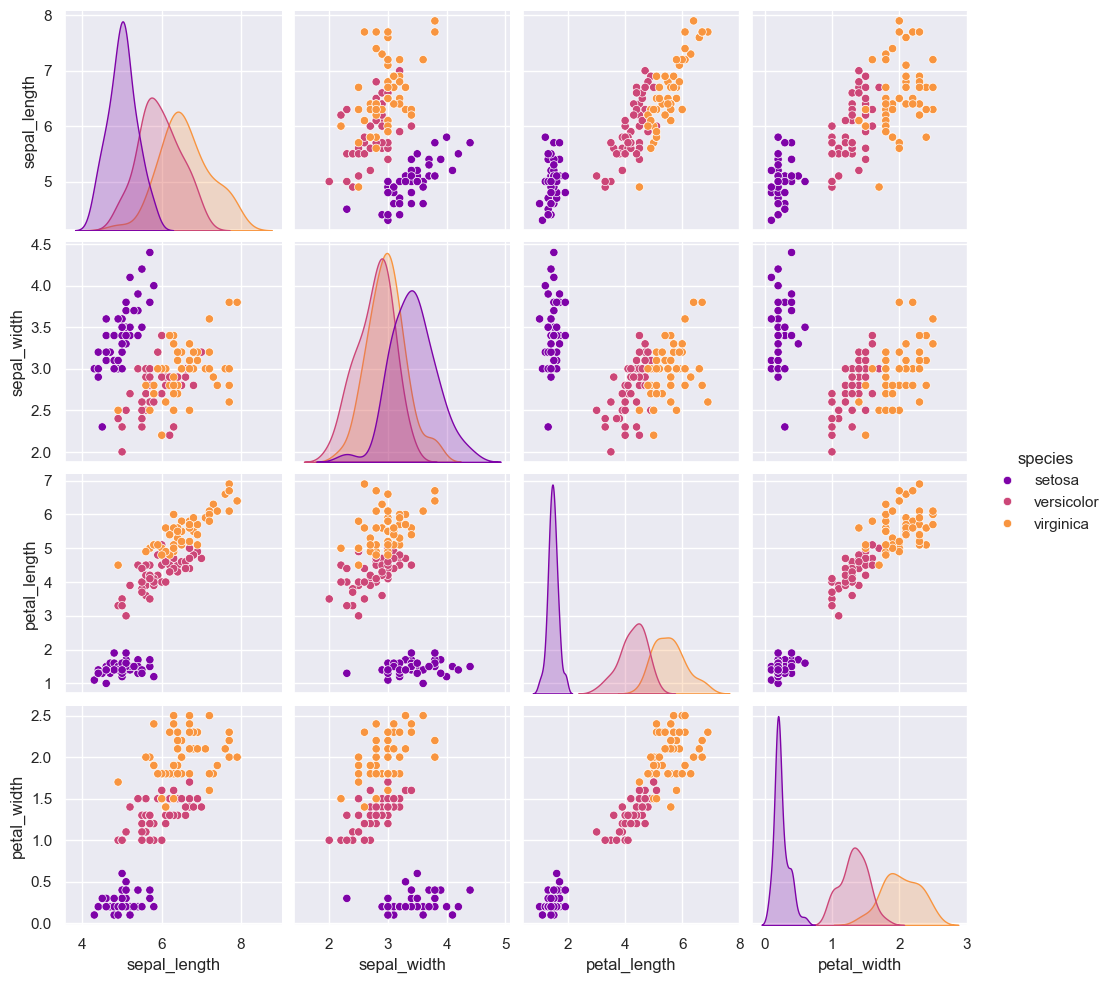

In [28]:
sns.set_theme(style="darkgrid")
sns.pairplot(iris,hue='species',palette='plasma')
plt.savefig("figures/pairplot_iris.png",
            dpi=300, bbox_inches="tight")
plt.show()

## Interpretation

The scatter plot shows that the Setosa species is well separated, 
while Versicolor and Virginica present
partial overlap.

## Train-Test Split

The dataset is split into training and testing sets to
evaluate the model's ability to generalize to unseen data.

In [10]:
X=iris.drop(['species'],axis=1)
y=iris['species']
le = sklearn.preprocessing.LabelEncoder() 
y_encoded = le.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y_encoded,
    test_size=0.20,
    random_state=44,
    stratify=y_encoded
) 


## Plot Decision Boundaries
We create a function that plots the decision boundaries for a model that was only trained with sepal features or petal features 

In [24]:

from matplotlib.colors import ListedColormap, BoundaryNorm

def plotmodelboundaries(model_sepal, model_petal,x_test,y_test,title=None):


    colors = ['#0d0887', '#cc4678', '#f0f921']
    cmap = ListedColormap(colors)
    
    fig,ax = plt.subplots(1, 2, figsize=(14, 6))
    if title:
        fig.suptitle(title, fontsize=16)
        
    x_min,x_max = x_test.iloc[:,0].min()-1, x_test.iloc[:,0].max()+1
    y_min,y_max = x_test.iloc[:,1].min()-1, x_test.iloc[:,1].max()+1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,200),np.linspace(y_min,y_max,200))
    xx_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=x_test.columns[:2])
    z = model_sepal.predict(xx_df).reshape(xx.shape)
    ax[0].contourf(xx, yy, z, alpha=0.3,cmap=cmap)
    sns.scatterplot(
    x=x_test.iloc[:,0],
    y=x_test.iloc[:,1],
    hue=le.inverse_transform(y_test),
    palette=colors,ax=ax[0],edgecolor='black',hue_order=le.classes_
)
    ax[0].set_title("Sepal Length X Width")
    ax[0].set_xlabel("Sepal Length")
    ax[0].set_ylabel("Sepal Width")
    x_min1,x_max1 = x_test.iloc[:,2].min()-1, x_test.iloc[:,2].max()+1
    y_min1,y_max1 = x_test.iloc[:,3].min()-1, x_test.iloc[:,3].max()+1
    xx1,yy1=np.meshgrid(np.linspace(x_min1,x_max1,200),np.linspace(y_min1,y_max1,200))
    xx1_df = pd.DataFrame(np.c_[xx1.ravel(), yy1.ravel()], columns=x_test.columns[2:])
    z1 = model_petal.predict(xx1_df).reshape(xx1.shape)
    ax[1].contourf(xx1, yy1, z1, alpha=0.3,cmap=cmap)
    sns.scatterplot(
    x=x_test.iloc[:,2],
    y=x_test.iloc[:,3],
    hue=le.inverse_transform(y_test),
    palette=colors,ax=ax[1],edgecolor='black',hue_order=le.classes_
)
    ax[1].set_title("Petal Length X Width")
    ax[1].set_xlabel("Petal Length")
    ax[1].set_ylabel("Petal Width")
    fig.savefig("figures/output.png", dpi=300, bbox_inches="tight")
    plt.show()
    

## Pipelines
Creating a pipelines dictionary containing different types of models that we want to test

In [13]:
pipelines = { "LogReg": Pipeline([ ("scaler", StandardScaler()), 
                                   ("model", sklearn.linear_model.LogisticRegression(max_iter=200)) ]),
              "SVM": Pipeline([ ("scaler", StandardScaler()), ("model", sklearn.svm.SVC()) ]), 
              "KNN": Pipeline([ ("scaler", StandardScaler()), ("model", sklearn.neighbors.KNeighborsClassifier()) ]),
              "Decision Tree": sklearn.tree.DecisionTreeClassifier(random_state=44,max_depth =4), 
              "Random Forest": sklearn.ensemble.RandomForestClassifier(random_state=44,max_depth=4), 
              "Gradient Boosting": sklearn.ensemble.GradientBoostingClassifier(random_state=44,max_depth=1) } 

## Model Training

A classification model is trained using the training data
to learn decision boundaries between the different Iris species.

In [14]:
for name,model in pipelines.items():
    model.fit(X_train,y_train)

In [15]:
##Testing the Accuracy score of each model
Ac = pd.DataFrame({"Modelo":[],'Accuracy':[]})
for name, model in pipelines.items():
    ac = sklearn.metrics.accuracy_score(y_test,model.predict(X_test))
    acs = ac*100
    Ac.loc[len(Ac)]=[name,acs]
    print(f"A Accuracy do modelo {name} é {acs}%")
Ac.head()

A Accuracy do modelo LogReg é 96.66666666666667%
A Accuracy do modelo SVM é 96.66666666666667%
A Accuracy do modelo KNN é 96.66666666666667%
A Accuracy do modelo Decision Tree é 96.66666666666667%
A Accuracy do modelo Random Forest é 96.66666666666667%
A Accuracy do modelo Gradient Boosting é 96.66666666666667%


,Modelo,Accuracy
0,LogReg,96.666667
1,SVM,96.666667
2,KNN,96.666667
3,Decision Tree,96.666667
4,Random Forest,96.666667


## Conclusion on the scores

Interestingly, the accuracy obtained using all features
is very similar to the accuracy obtained when using
only subsets of features.
    
Since the model achieved similar accuracy when trained using all features,
we further investigate the contribution of different feature groups.

To better understand which measurements are more informative,
we train separate models using only sepal features and only petal features.

In [16]:
X_train_S = X_train.iloc[:, 0:2]
X_train_P = X_train.iloc[:, 2:4]
X_test_S  = X_test.iloc[:, 0:2]
X_test_P  = X_test.iloc[:, 2:4]
pipelines_S = { "LogReg": Pipeline([ ("scaler", StandardScaler()), 
                                   ("model", sklearn.linear_model.LogisticRegression(max_iter=200)) ]),
              "SVM": Pipeline([ ("scaler", StandardScaler()), ("model", sklearn.svm.SVC()) ]), 
              "KNN": Pipeline([ ("scaler", StandardScaler()), ("model", sklearn.neighbors.KNeighborsClassifier()) ]),
              "Decision Tree": sklearn.tree.DecisionTreeClassifier(random_state=44,max_depth =4), 
              "Random Forest": sklearn.ensemble.RandomForestClassifier(random_state=44,max_depth=4), 
              "Gradient Boosting": sklearn.ensemble.GradientBoostingClassifier(random_state=44,max_depth=1) } 
pipelines_P = { "LogReg": Pipeline([ ("scaler", StandardScaler()), 
                                   ("model", sklearn.linear_model.LogisticRegression(max_iter=200)) ]),
              "SVM": Pipeline([ ("scaler", StandardScaler()), ("model", sklearn.svm.SVC()) ]), 
              "KNN": Pipeline([ ("scaler", StandardScaler()), ("model", sklearn.neighbors.KNeighborsClassifier()) ]),
              "Decision Tree": sklearn.tree.DecisionTreeClassifier(random_state=44,max_depth =4), 
              "Random Forest": sklearn.ensemble.RandomForestClassifier(random_state=44,max_depth=4), 
              "Gradient Boosting": sklearn.ensemble.GradientBoostingClassifier(random_state=44,max_depth=1) } 
for name,model in pipelines_S.items():
    model.fit(X_train_S,y_train)
for name,model in pipelines_P.items():
    model.fit(X_train_P,y_train)

In [17]:
Acs = pd.DataFrame({"Modelo":[],'Accuracy':[]})
for name, model in pipelines_S.items():
    ac = sklearn.metrics.accuracy_score(y_test,model.predict(X_test_S))
    acs = ac*100
    Acs.loc[len(Acs)]=[name,acs]
    print(f"The Accuracy of model {name} with Sepal features {acs}%")
Acs.tail()

The Accuracy of model LogReg with Sepal features 86.66666666666667%
The Accuracy of model SVM with Sepal features 83.33333333333334%
The Accuracy of model KNN with Sepal features 86.66666666666667%
The Accuracy of model Decision Tree with Sepal features 83.33333333333334%
The Accuracy of model Random Forest with Sepal features 90.0%
The Accuracy of model Gradient Boosting with Sepal features 86.66666666666667%


,Modelo,Accuracy
1,SVM,83.333333
2,KNN,86.666667
3,Decision Tree,83.333333
4,Random Forest,90.000000
5,Gradient Boosting,86.666667


In [18]:
Acp = pd.DataFrame({"Modelo":[],'Accuracy':[]})
for name, model in pipelines_P.items():
    ac = sklearn.metrics.accuracy_score(y_test,model.predict(X_test_P))
    acs = ac*100
    Acp.loc[len(Acp)]=[name,acs]
    print(f"The Accuracy of model {name} with Petal features {acs}%")
Acp.tail()

The Accuracy of model LogReg with Petal features 96.66666666666667%
The Accuracy of model SVM with Petal features 96.66666666666667%
The Accuracy of model KNN with Petal features 96.66666666666667%
The Accuracy of model Decision Tree with Petal features 96.66666666666667%
The Accuracy of model Random Forest with Petal features 96.66666666666667%
The Accuracy of model Gradient Boosting with Petal features 96.66666666666667%


,Modelo,Accuracy
1,SVM,96.666667
2,KNN,96.666667
3,Decision Tree,96.666667
4,Random Forest,96.666667
5,Gradient Boosting,96.666667


## Sepal X Petal Features
When training the model using only sepal features,
the performance is lower compared to using petal features.

This indicates that petal-related measurements provide
better discrimination for distinguishing between
the species.


# Decision Boundary Visualization
As all the models achieved the same accuracy using petal features,
we plot the decision boundaries of the four top-performing models on sepal features(KNN, 
Random Forest, Logistic Regression, and Gradient Boosting)
to compare how each algorithm separates the feature space.


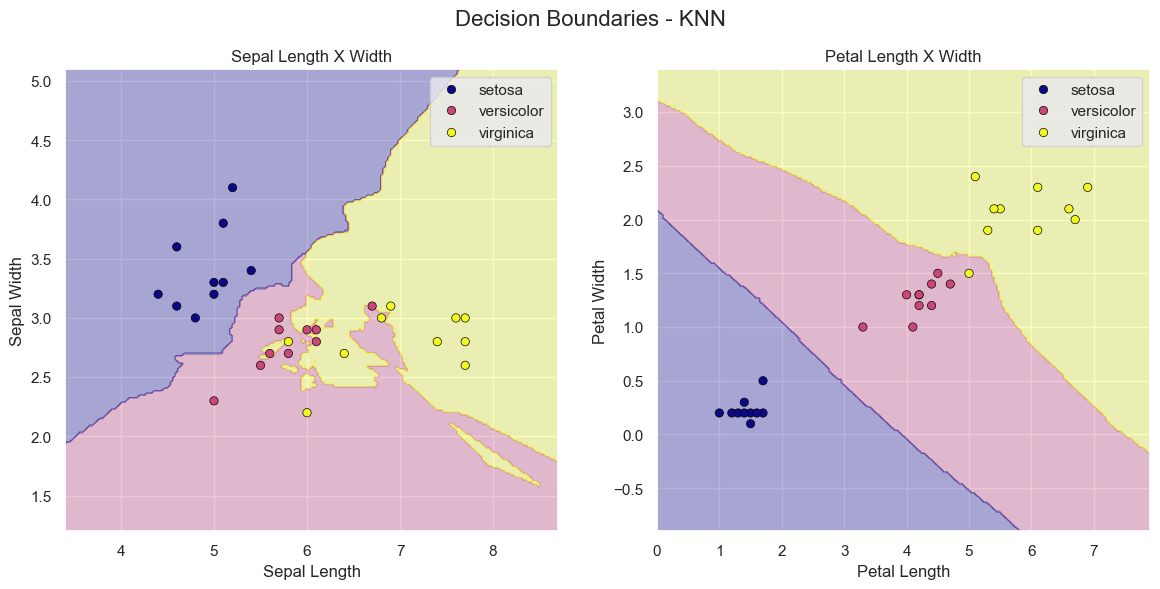

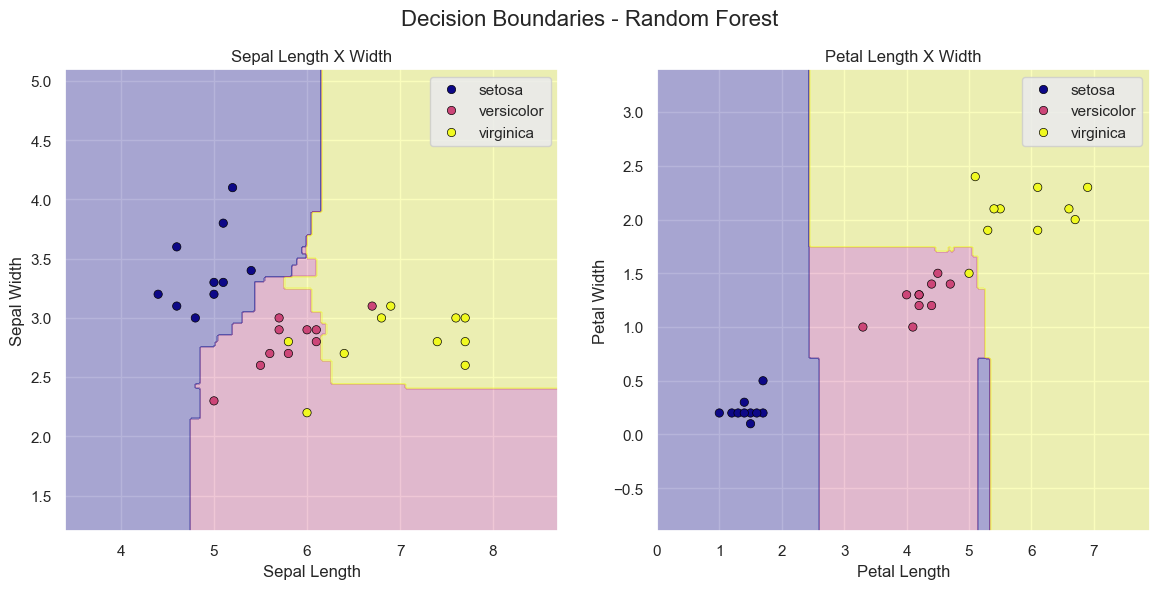

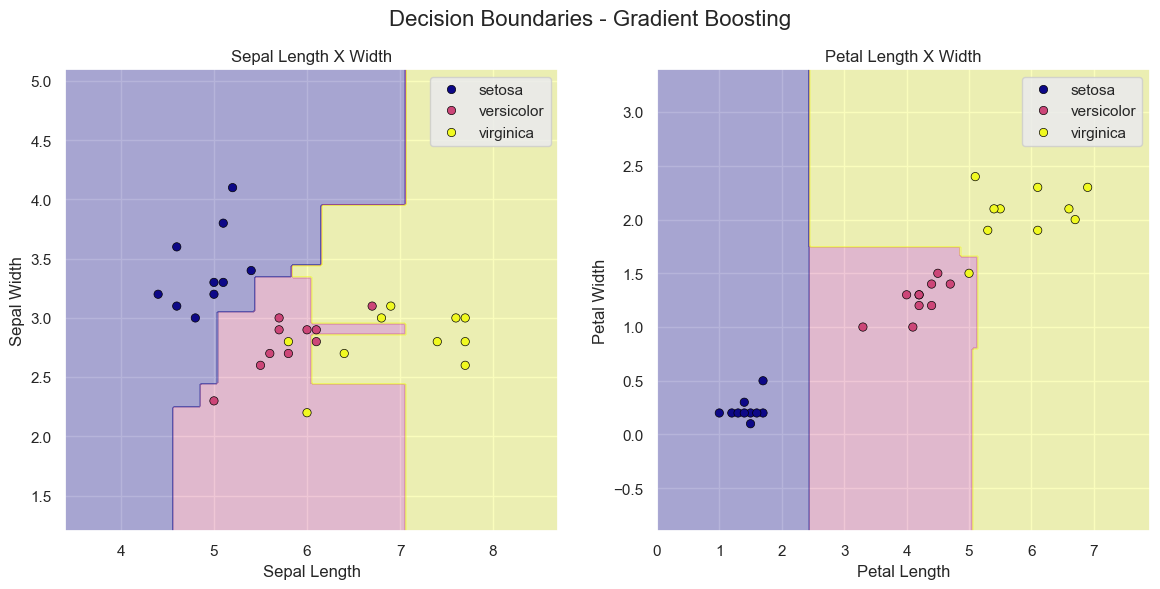

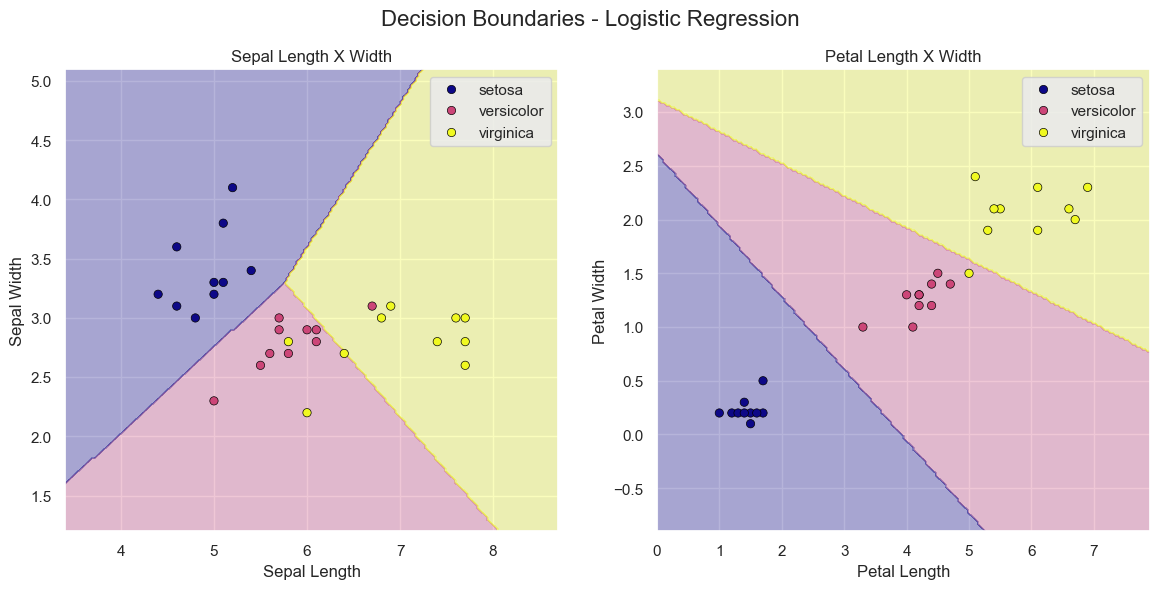

In [25]:
plotmodelboundaries(pipelines_S['KNN'],pipelines_P['KNN'],X_test,y_test,"Decision Boundaries - KNN")
plotmodelboundaries(pipelines_S['Random Forest'],pipelines_P['Random Forest'],X_test,y_test,"Decision Boundaries - Random Forest")
plotmodelboundaries(pipelines_S['Gradient Boosting'],pipelines_P['Gradient Boosting'],X_test,y_test,"Decision Boundaries - Gradient Boosting")
plotmodelboundaries(pipelines_S['LogReg'],pipelines_P['LogReg'],X_test,y_test,"Decision Boundaries - Logistic Regression")

## Conclusion of the project

In this project, we evaluated multiple classification models on the Iris dataset
and analyzed their performance using different feature subsets.
Although the models achieved similar accuracy, visualizing the decision
boundaries revealed important differences in how each algorithm separates
the feature space.

Linear models such as Logistic Regression produce smooth, straight boundaries,
while instance-based and ensemble methods like KNN, Random Forest, and Gradient
Boosting generate more complex boundaries that better adapt to the data distribution.
KNN produces highly irregular decision boundaries due to its relianceon local neighborhood voting.
In contrast, tree-based ensemble methods such as Random Forest and
Gradient Boosting generate block-like boundaries as they are composed of multiple decision trees.
